In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
import winsound

In [3]:
labels = ["drowsiness" , "undrowsiness"]
model = tf.keras.models.load_model('model_30Nov_15epoch.h5')
print(model.input.shape)

(None, 150, 150, 3)


In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [5]:
def get_label_index(pre):
    if pre[0][0] > 0.5:
        return 1
    else:
        return 0

In [44]:

def display_multiple_img(images, rows = 1, cols=1):
    figure, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(10,10))
#     figure.tight_layout(pad=2.0)
    for ind,detail in enumerate(images):
#         print(ind,detail)
        ax.ravel()[ind].imshow(detail["img"])
        ax.ravel()[ind].set_title(detail["label"])
        ax.ravel()[ind].set_axis_off()
    plt.tight_layout()
    plt.savefig("out.png")
    plt.show()



In [32]:
from tensorflow import keras
import os
DIR = "test/images"
IMG_label = []
for imgFile in os.listdir(DIR):
    img_path = os.path.join(DIR,imgFile)
    img = keras.preprocessing.image.load_img(img_path,target_size =(150,150))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array,0)
    pred = model.predict(img_array)
    label = labels[get_label_index(pred)]
    IMG_label.append({"img" : img,"label" : label})
print(len(IMG_label))

18


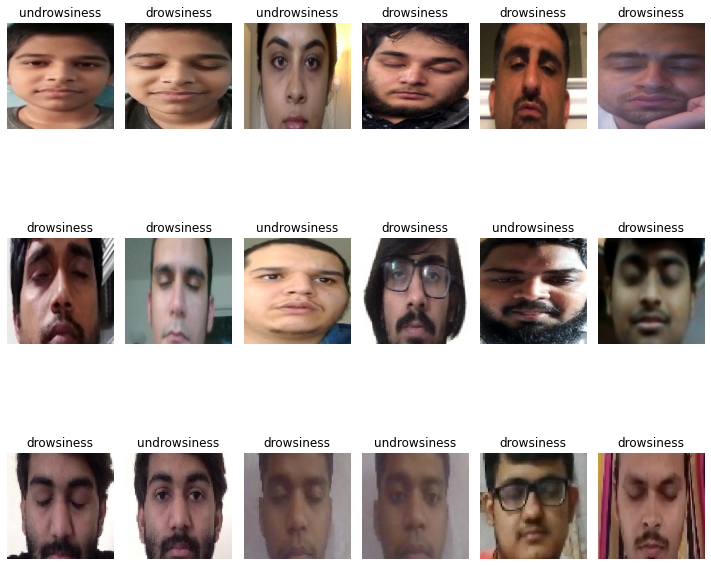

In [45]:
display_multiple_img(IMG_label,3,6)

In [16]:
frequency = 2200
duration = 2000  
# winsound.Beep(frequency, duration)
cap = cv2.VideoCapture("test/video/faizan_undrowsiness.mp4")
label = "Testing"
TRACKER = []
size = 150
labels = ["drowsiness" , "undrowsiness"]
face_cascade = cv2.CascadeClassifier("haarcascade/haarcascade_frontalface_alt.xml")
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    frame = cv2.rotate(frame, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)
    width,height,layer = frame.shape
    
    # Our operations on the frame come here
#     frame = cv2.fastNlMeansDenoisingColored(frame,None,10,10,7,11)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray, scaleFactor = 1.1, minNeighbors = 5,minSize = (30,30))
    for (x,y,w,h) in faces:
#         print(x,y,w,h)
        roi_image = frame[y:y+h,x:x+w]
        
        roi_image = cv2.resize(roi_image , (size , size))
        roi_image = np.array(roi_image,dtype="float64")
        roi_image = roi_image.reshape(-1,size,size,3)
#         roi_image = np.array(roi_image,dtype="float32")
        pre = model.predict([roi_image])
    
        color = (0,211,255)
        stroke = 2
        end_x = x+w
        end_y = y+h
        
        cv2.rectangle(frame, (x,y), (end_x,end_y), color, stroke)
        label_index = get_label_index(pre)
        
        TRACKER.append(label_index)
        if label == "drowsiness":
            print("sound play")
            winsound.Beep(frequency, duration)
            
        if len(TRACKER)==10:
            total_sum = sum(TRACKER)
            avg = total_sum/10
            TRACKER.clear()
            if avg > 0.5:
                label = "undrowsiness"
            else:
                label = "drowsiness"
                
            
                
                
        print(label_index,pre)

    cv2.putText(frame,label, (0,100), cv2.FONT_HERSHEY_SIMPLEX, 3, (0,0,255))
#     frame = cv2.resize(frame,(800,600))
    cv2.imshow('frame',frame)
    count+=1
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()


0 [[0.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
0 [[0.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
0 [[4.46855e-35]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
1 [[1.]]
